# Importing libraries and dependencies

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Loading the dataset

In [2]:
df=pd.read_csv(r'real_estate_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


In [3]:
df.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [4]:
df.describe()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


In [5]:
print(df.shape)
print(df.dtypes)

(500, 12)
ID                      int64
Square_Feet           float64
Num_Bedrooms            int64
Num_Bathrooms           int64
Num_Floors              int64
Year_Built              int64
Has_Garden              int64
Has_Pool                int64
Garage_Size             int64
Location_Score        float64
Distance_to_Center    float64
Price                 float64
dtype: object


In [6]:
df.isnull().sum()

ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64

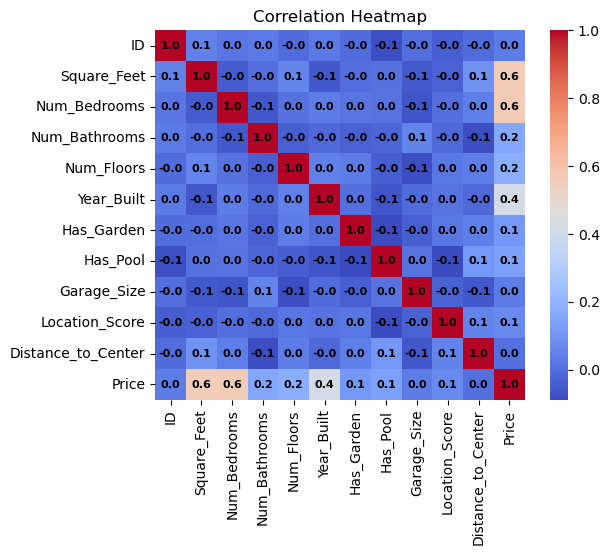

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, 
            cbar=True, 
            square=True, 
            fmt=".1f", 
            annot=True, 
            annot_kws={'size':8, 'color':'black', 'weight':'bold'}, 
            cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

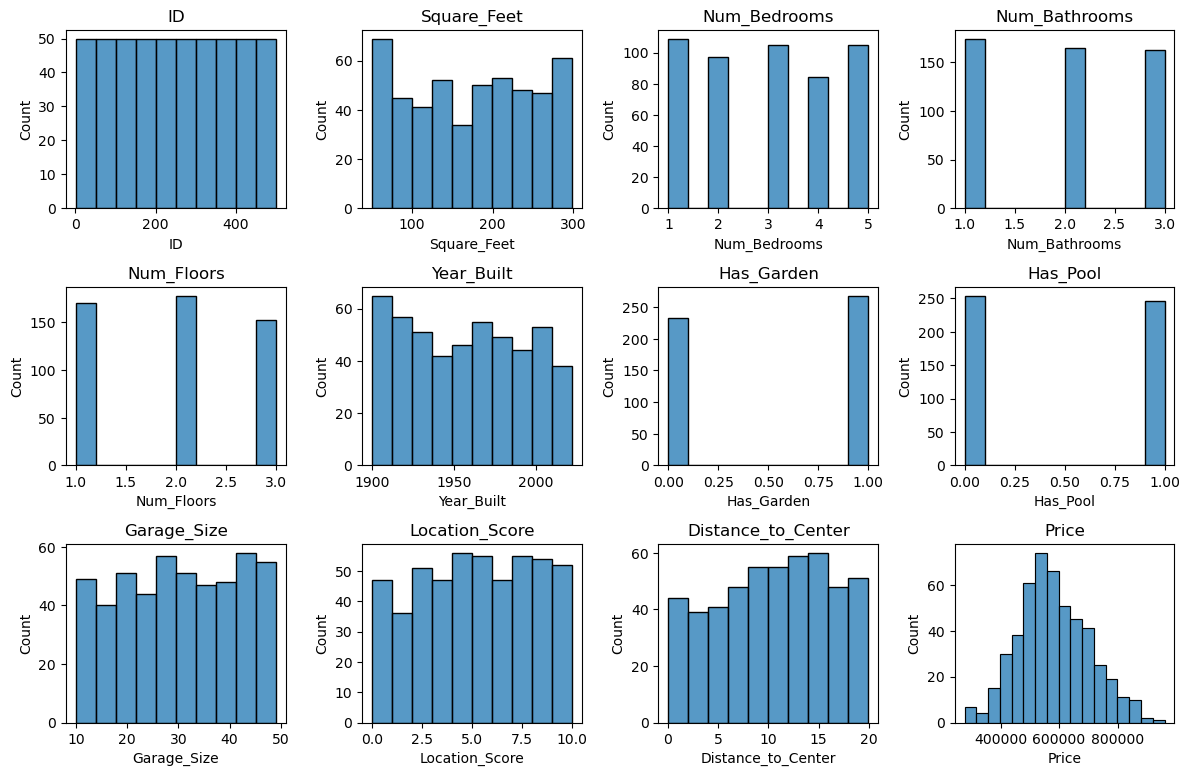

In [32]:
plt.figure(figsize=(12, 10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,4,i)
    sns.histplot(df[col])
    plt.title(col)
    plt.tight_layout()
    

In [34]:
for col in df.columns:
    print(col)
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print()

ID
Min: 1
Max: 500

Square_Feet
Min: 51.265395961554674
Max: 298.2411990298251

Num_Bedrooms
Min: 1
Max: 5

Num_Bathrooms
Min: 1
Max: 3

Num_Floors
Min: 1
Max: 3

Year_Built
Min: 1900
Max: 2022

Has_Garden
Min: 0
Max: 1

Has_Pool
Min: 0
Max: 1

Garage_Size
Min: 10
Max: 49

Location_Score
Min: 0.0044278143720788
Max: 9.995439187190945

Distance_to_Center
Min: 0.0628181209624423
Max: 19.92796587358111

Price
Min: 276892.4701358937
Max: 960678.274291193



# checking outliers and handle outliers

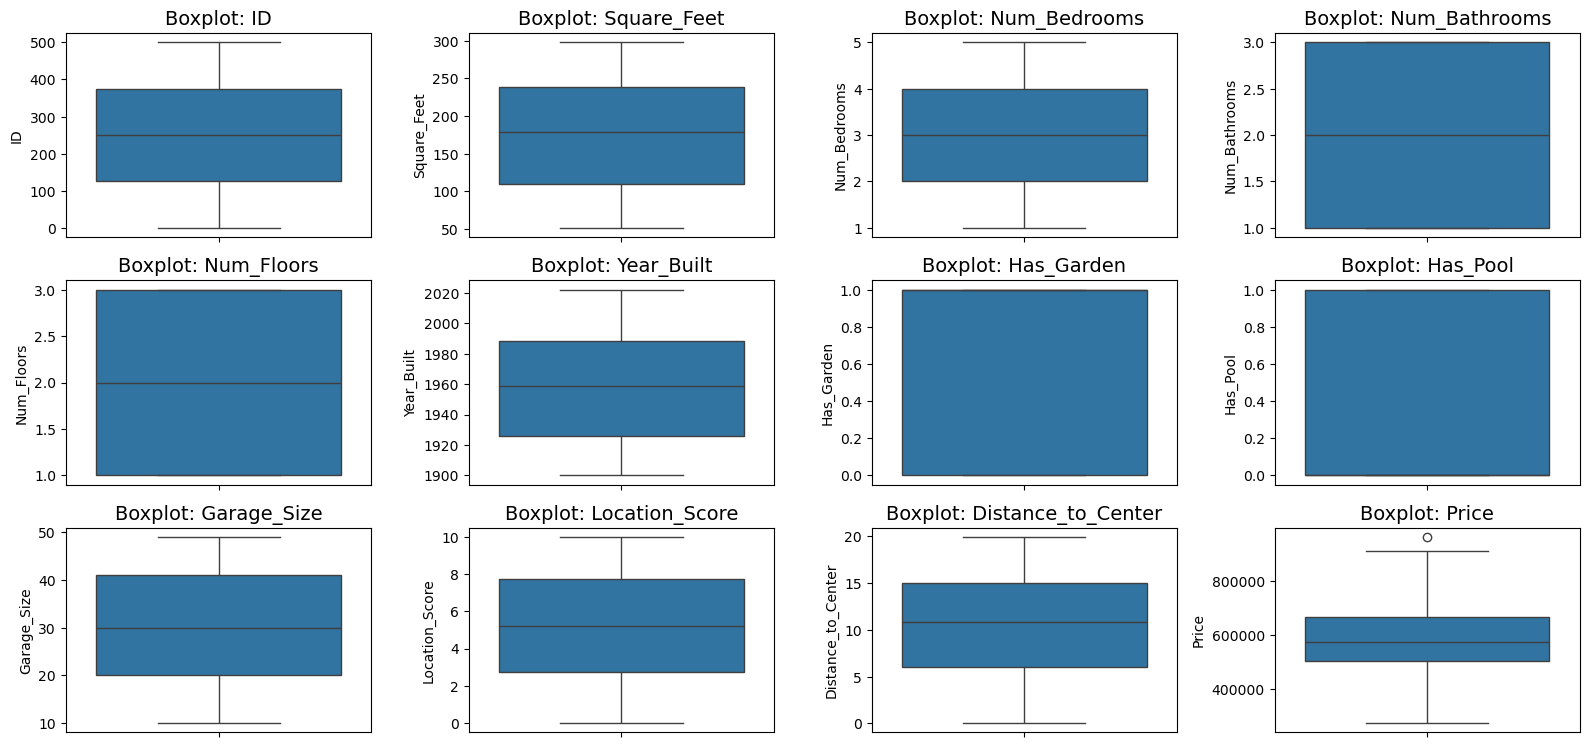

In [8]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)  
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot: {column}", fontsize=14)
    plt.tight_layout()

plt.show()

# splitting X and Y 

In [9]:
x=df.drop(['Price'],axis=1)
y=df['Price']
print(x.head(5))
print(y.head(5))

   ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0   1   143.635030             1              3           3        1967   
1   2   287.678577             1              2           1        1949   
2   3   232.998485             1              3           2        1923   
3   4   199.664621             5              2           2        1918   
4   5    89.004660             4              3           3        1999   

   Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  
0           1         1           48        8.297631            5.935734  
1           0         1           37        6.061466           10.827392  
2           1         0           14        2.911442            6.904599  
3           0         0           17        2.070949            8.284019  
4           1         0           34        1.523278           14.648277  
0    602134.816747
1    591425.135386
2    464478.696880
3    583105.655996
4    619879.142523
Name

# Model Selection

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)


(400, 11)
(100, 11)


In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(r2)


0.9806505185682766


# visualize the predicted values

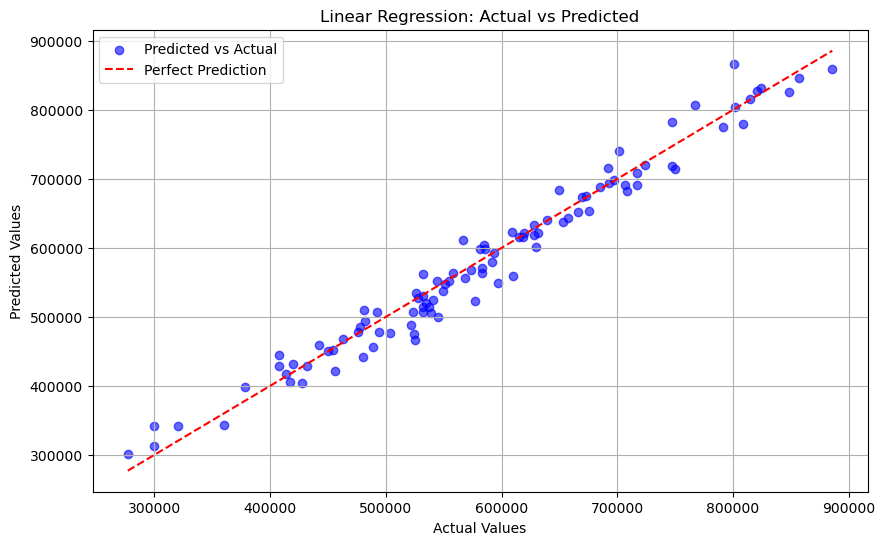

In [19]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')




plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)


plt.show()


In [13]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(model,file)
print("model is saved")

model is saved


In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model1 = LinearRegression()
model1.fit(x_train_poly, y_train)

y_pred = model1.predict(x_test_poly)
r2 = r2_score(y_test, y_pred)
print(r2)


0.9675376907432173
